<a href="https://colab.research.google.com/github/JSEFERINO/JHSERIES2/blob/main/11_Series_Tiempo_Cap9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Introductorio Series de Tiempo por Julio Hurtado Márquez**
## **Text: Time Series Forecasting in Python - MARCO PEIXEIRO**
# **Parte 2. Pronósticos con modelos estadísticos**

# **9. Añadiendo variables externas a nuestro modelo**
### **Este capítulo cubre**
+ Análisis del modelo SARIMAX
+ Exploración del uso de variables externas para la previsión
+ Pronosticos mediante el modelo  $SARIMAX$

## **Introducción**
+ En los capítulos 4 a 8, hemos construido un modelo general que nos permite considerar patrones más complejos en series de tiempo.
+ Comenzamos nuestro viaje con los procesos autorregresivos y de promedio móvil antes de combinarlos en el modelo ARMA.
+ Luego agregamos una capa de complejidad para modelar series de tiempo no estacionarias, lo que nos llevó al modelo ARIMA.
+ Finalmente, en el capítulo 8 agregamos otra capa a ARIMA que nos permite considerar patrones estacionales en nuestros pronósticos, lo que resultó en el modelo SARIMA.
+ Hasta ahora, cada modelo que hemos explorado y utilizado para producir pronósticos ha considerado solo la serie de tiempo en sí.
+ En otras palabras, los valores pasados ​​de la serie de tiempo se utilizaron como predictores de valores futuros.
+ Sin embargo, es posible que las variables externas también tengan un impacto en nuestra serie de tiempo y, por lo tanto, puedan ser buenos predictores de valores futuros.
+ Esto nos lleva al modelo SARIMAX.
+ Notará la adición del término X, que denota variables exógenas.
+ En estadística, el término **exógeno** se utiliza para describir los predictores o variables de entrada, mientras que los **endógenos** se utilizan para definir la variable objetivo, es decir, lo que estamos tratando de predecir.
+ Con el modelo SARIMAX, ahora podemos considerar variables externas, o variables exógenas, al pronosticar una serie temporal.

### **Ejemplo ilustrativo del Capitulo 9**
+ **Como ejemplo orientativo, utilizaremos un conjunto de datos macroeconómicos de los Estados Unidos, recopilados trimestralmente entre 1959 y 2009, para pronosticar el producto interno bruto (PIB) real, como se muestra en la figura 9.1.**

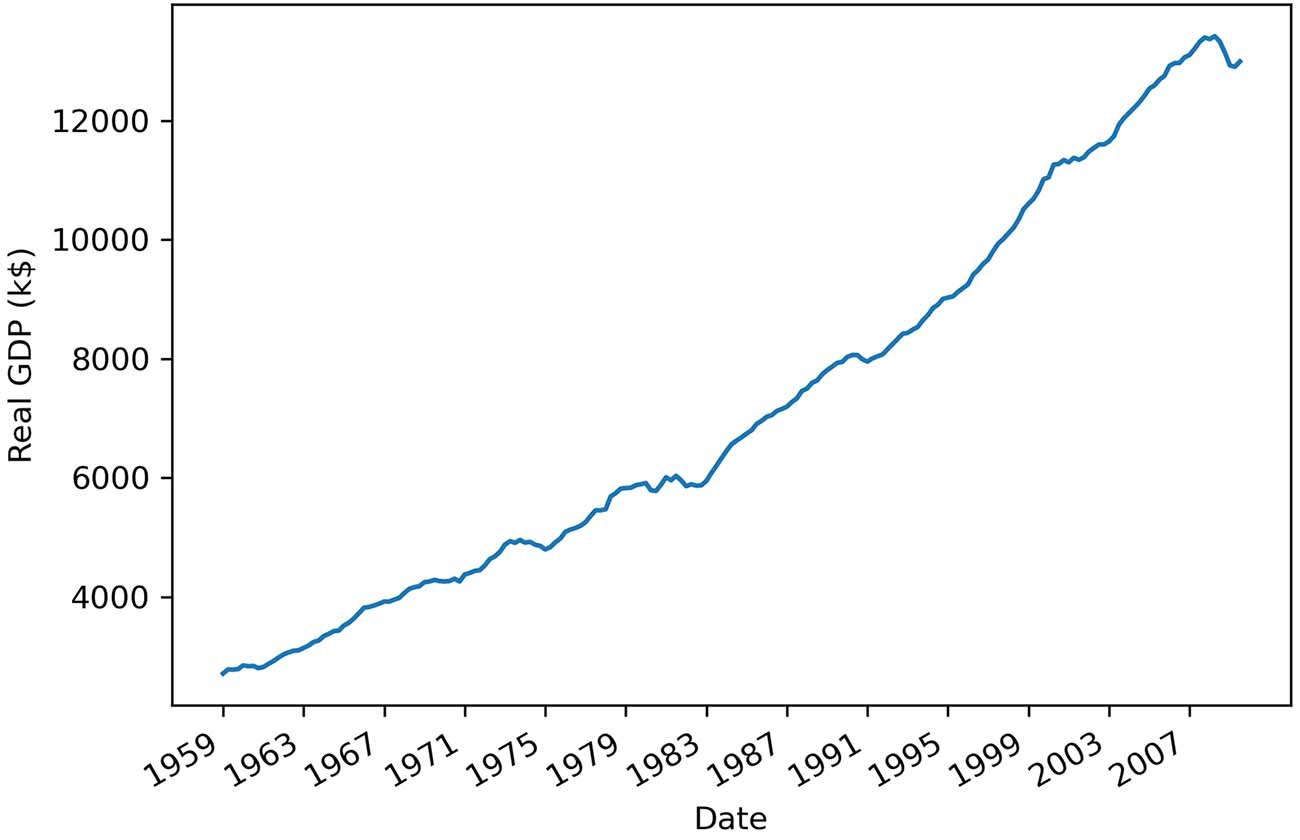

+ **Figura 9.1 Producto interno bruto (PIB) real de los Estados Unidos de 1959 a 2009. Los datos se recopilaron trimestralmente y están expresados ​​en miles de dólares estadounidenses. Obsérvese la clara tendencia positiva a lo largo de los años sin un patrón cíclico, lo que sugiere que no hay estacionalidad en la serie.**


### **Lo que se observa en la figura**
+ El PIB es el valor total de mercado de todos los bienes y servicios terminados producidos dentro de un país.
+ El PIB real es una medida ajustada a la inflación que elimina el impacto de la inflación en el valor de mercado de los bienes.
+ La inflación o la deflación pueden aumentar o disminuir respectivamente el valor monetario de los bienes y servicios, aumentando o disminuyendo así el PIB.
+ Al eliminar el efecto de la inflación, podemos determinar mejor si una economía experimentó una expansión de la producción.
+ Sin profundizar en los tecnicismos de la medición del PIB, definiremos el PIB como la suma del consumo C, el gasto público G, las inversiones I y las exportaciones netas NX, como se muestra en la ecuación 9.1.
+ **Ecuación 9.1** $$PIB = C + G + I + NX$$
+ Es probable que cada elemento de la ecuación 9.1 se vea afectado por alguna variable externa.
+ **Por ejemplo, es probable que el consumo se vea afectado por la tasa de desempleo, porque si hay menos personas empleadas, es probable que el consumo disminuya.**
+ **Las tasas de interés también pueden tener un impacto, porque si suben, es más difícil pedir dinero prestado y, como resultado, el gasto disminuye.**
+ También podemos pensar que los tipos de cambio de divisas tienen un impacto en las exportaciones netas.
+ *Una moneda local más débil generalmente estimulará las exportaciones y encarecerá las importaciones.*
+ De este modo, podemos ver cuántas variables exógenas pueden afectar probablemente al PIB real de los Estados Unidos.
+ En este capítulo, primero examinaremos el modelo SARIMAX y exploraremos una advertencia importante al usarlo para producir pronósticos.
+ Luego aplicaremos el modelo para pronosticar el PIB real de los Estados Unidos.

# **9.1. El modelo SARIMAX**
+ El modelo SARIMAX extiende aún más el modelo $SARIMA(p,d,q)(P,D,Q)_m$ al agregar el efecto de las variables exógenas.
+ Por lo tanto, podemos expresar el valor actual $y_t$ simplemente como un modelo $SARIMA(p,d,q)(P,D,Q)_m$ al que agregamos cualquier número de variables exógenas $X_t$ como se muestra en la ecuación 9.2.

+ **Ecuación 9.2. Modelo SARIMAX**

$$y_{t}=SARIMA(p,d,q)(P,D,Q)_m+\sum_{i=1}^{n}\beta _{i}X_{t}^{i}$$

+ El modelo SARIMA es un modelo lineal, ya que es una combinación lineal de valores pasados ​​de la serie y términos de error.
+ Aquí agregamos otra combinación lineal de diferentes variables exógenas, lo que hace que SARIMAX sea también un modelo lineal.
+ Tenga en cuenta que en SARIMAX puede incluir variables categóricas como variables exógenas, pero asegúrese de codificarlas (asignarles valores numéricos o indicadores binarios) tal como lo haría para las tareas de regresión tradicionales.
+ Hemos estado utilizando la función SARIMAX de statsmodels desde el capítulo 4 para implementar diferentes modelos.
+ Esto se debe a que SARIMAX es la función más general para pronosticar una serie temporal.
+ Ahora comprende cómo un modelo SARIMAX sin variables exógenas es un modelo SARIMA.
+ De manera similar, un modelo sin estacionalidad pero con variables exógenas puede denominarse modelo ARIMAX, y un modelo sin estacionalidad y sin variables exógenas se convierte en un modelo ARIMA.
+ Dependiendo del problema, se utilizarán diferentes combinaciones de cada parte del modelo SARIMAX general.
+ En teoría, esto resume el modelo SARIMAX. Los capítulos 4 a 8 se ordenaron deliberadamente de tal manera que desarrolláramos el modelo SARIMAX de manera incremental, lo que hizo que la adición de variables exógenas fuera fácil de entender. Para reforzar su aprendizaje, exploremos las variables exógenas de nuestro conjunto de datos.

# **9.1.1. Exploración de las variables exógenas del conjunto de datos de macroeconomía de EE. UU**.
+ Carguemos el conjunto de datos de macroeconomía de EE. UU. y exploremos las diferentes variables exógenas disponibles para pronosticar el PIB real.
+ Este conjunto de datos está disponible con la biblioteca statsmodels, lo que significa que no necesita descargar y leer un archivo externo.
+ Puede cargar el conjunto de datos utilizando el módulo de conjuntos de datos de statsmodels.

#### **Paso 1. Las librerias de necesarias**

In [ ]:
#### **Paso 1. Las librerias de necesarias**
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import sklearn.metrics

In [ ]:
# hacer que los graficos se vean bonitos
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [ ]:
# Ignorar advertencias innecesarias
import warnings
warnings.filterwarnings('ignore')

## **Paso 2. Importando los datos**
+ Carguemos el conjunto de datos de macroeconomía de EE. UU. y exploremos las diferentes variables exógenas disponibles para pronosticar el PIB real.
+ Este conjunto de datos está disponible con la biblioteca statsmodels, lo que significa que no necesita descargar y leer un archivo externo.

In [ ]:
## **Paso 2. Importando los datos**
import pandas as pd
# cargar el conjunto de datos macroeconómicos de EE.UU.
df = sm.datasets.macrodata.load_pandas().data

df # Muestra las primeras cinco filas de datos.


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [ ]:
print(len(df))

203


#### **Acerca del Paso 2. Importando los datos**
+ Esto muestra el DataFrame completo que contiene el conjunto de datos macroeconómicos de EE. UU.
+ *La Tabla 9.1 describe el significado de cada variable.*
+ Tenemos nuestra variable objetivo, o variable endógena, que es el PIB real. Luego tenemos 11 variables exógenas que se pueden usar para realizar pronósticos, como los gastos de consumo personal y federal, la tasa de interés, la tasa de inflación, la población y otras.
+ **La Tabla 9.1**

|Variable|Descripcion|
|:--|--:|
|realgdp:| producto interno bruto real (nuestra variable objetivo)|
|realcons:| gasto de consumo personal real|
|realinv:| inversión interna privada bruta real|
|realgovt:| gasto de consumo federal real e inversión|
|realdpi:| ingreso privado disponible real|
|cpi:| índice de precios al consumidor para el final del trimestre|
|m1| M1 stock nominal de dinero
|tbilrate| Promedio mensual trimestral de la letra del tesoro a 3 meses
|unemp |Tasa de desempleo
|pop |Población total al final del trimestre
|infl |Tasa de inflación
|realint| Tasa de interés real




+ Por supuesto, cada una de estas variables puede ser o no un buen predictor del PIB real.
+ **No tenemos que realizar una selección de características porque el modelo lineal atribuirá un coeficiente cercano a 0 a las variables exógenas que no sean significativas para predecir el objetivo.**
+ En aras de la simplicidad y la claridad, en este capítulo solo trabajaremos con seis variables: el PIB real, que es nuestro objetivo, y las siguientes cinco variables enumeradas en la tabla 9.1 (cons reales al IPC) como nuestras variables exógenas.
+ Podemos visualizar cómo se comporta cada variable a lo largo del tiempo para ver si podemos discernir algún patrón distintivo. El resultado se muestra en la figura 9.2.

### **Paso 3. Dibuje nuestra variable objetivo con varias exogenas**

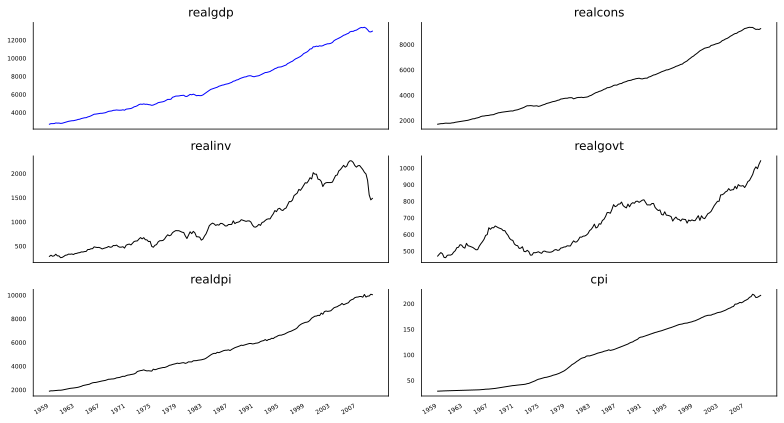

In [ ]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (11, 6))

color = 'b'
for i, ax in enumerate(axs.flatten()[:6]):
    # :6 ya que solo queremos los primeros seis

# i + 2 ya que queremos omitir las columnas de año y trimestre
    data = df[df.columns[i + 2]]

    ax.plot(data, color = color, linewidth = 1)
    color = 'k'
    ax.set_title(df.columns[i + 2])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize = 6)

plt.setp(axs, xticks = np.arange(0, 208, 16), xticklabels=np.arange(1959, 2010, 4))

fig.autofmt_xdate()
plt.tight_layout()

+ **Figura 9.2 Evolución del PIB real y cinco variables exógenas de 1959 a 2009. Observará que realgdp, realcons, realdpi y cpi tienen una forma similar, lo que significa que realcons, realdpi y cpi son predictores potencialmente buenos, aunque un análisis gráfico no es suficiente para confirmar esa idea. Por otro lado, realgovt tiene picos y valles que no aparecen en realgdp, por lo que podemos plantear la hipótesis de que realgovt es un predictor más débil.**

### **dos formas de trabajar con variables exógenas**

+ Hay dos formas de trabajar con variables exógenas para la previsión de series temporales.
+ *En primer lugar, podríamos entrenar varios modelos con varias combinaciones de variables exógenas y ver qué modelo genera las mejores pronósticos.*
+ *Alternativamente, podemos simplemente incluir todas las variables exógenas y ceñirnos a la selección de modelos utilizando el AIC, ya que sabemos que esto produce un modelo de buen ajuste que no se sobreajusta.*

#### **Paso 4. Si existe algun patron estacional construya un grafico donde se aprecie el patron**
+ Estamos tratando de predecir el PIB real, así que sigamos como lo hacemos habitualmente.
+ Probaremos la estacionariedad, pero antes de eso, descompongamos la serie, porque me gusta mucho cómo se ve, y para ver si hay estacionalidad, por supuesto.

In [ ]:
# el período es igual a la frecuencia
# STL significa descomposición de tendencia estacional utilizando LOESS.
decomposition = sm.tsa.STL(df.realgdp, period = 12).fit()

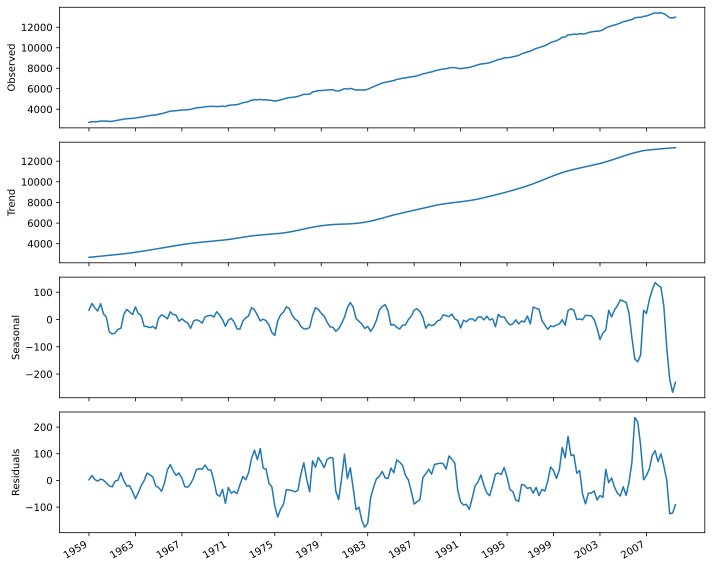

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(
    nrows = 4, ncols = 1,
    sharex = True,
    figsize=(10,8)
)

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')
ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')
ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')

plt.xticks(np.arange(0, 208, 16), np.arange(1959, 2010, 4))


fig.autofmt_xdate()
plt.tight_layout()

plt.show()

+ **Está bien, no parece que tenga estacionalidad. Probemos entonces si es estacionario.**

### **Acerca de la descomposición de la serie**
+ En la figura 8.4 puede ver cada componente de nuestra serie temporal.
+ Notará que el eje $y$ de los gráficos de los componentes de tendencia, estacionalidad y residuos son ligeramente diferentes de los datos observados.
+ Esto se debe a que cada gráfico muestra la magnitud del cambio que se atribuye a ese componente en particular.
+ De esa manera, la suma de los componentes de tendencia, estacionalidad y residuos da como resultado los datos observados que se muestran en el gráfico superior.
+ Esto explica por qué el componente estacional a veces está en valores negativos y otras veces en valores positivos, ya que crea los picos y valles en los datos observados.

#### **Una serie temporal sin patrón estacional**
+ *En una situación en la que tenemos una serie temporal sin patrón estacional*, el proceso de descomposición mostrará una línea horizontal plana en $0$ para el **componente estacional**.
+ Puede ver cómo la descomposición de series temporales puede ayudarnos a determinar si nuestros datos son estacionales o no.
+ *Este es un método gráfico y no una prueba estadística, pero es suficiente para determinar si una serie es estacional o no, de modo que podamos aplicar el modelo adecuado para realizar pronósticos.*
+ ***De hecho, no existen pruebas estadísticas para identificar la estacionalidad en series temporales.***
+ ***Ahora que ya sabes cómo identificar patrones estacionales en una serie, podemos pasar a adaptar el procedimiento general de modelado para incluir los nuevos parámetros del modelo SARIMA(p,d,q)(P,D,Q)m y pronosticar el número de pasajeros aéreos mensuales.***

#### **Paso 5. Ejecute la prueba ADF y verifique si el proceso original es estacionario. Si no lo es, aplique la diferenciación.**

In [ ]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [ ]:
### **Prueba de estacionariedad**
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(df.realgdp)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
print(f'¿Cuando se rechaza la Hipótesis Nula?')
print(f'Se rechaza si ocurren:')
print(f'ADF = {ADF_result[0]} es negativo y')
print(f'Si valor p ={round(ADF_result[1],4)} es menor a 0.05')

ADF Statistic: 1.7504627967647144
p-value: 0.9982455372335032
¿Cuando se rechaza la Hipótesis Nula?
Se rechaza si ocurren:
ADF = 1.7504627967647144 es negativo y
Si valor p =0.9982 es menor a 0.05


## **Acerca del Paso 5**
+ Este bloque de código devuelve una estadística ADF de 1.75 con un valor p de 0.99.
+ Dado que la estadística ADF no es un número negativo grande y el valor p es mayor que 0,05, no podemos rechazar la hipótesis nula, lo que significa que nuestra serie no es estacionaria.
+ Necesitamos determinar cuántas veces se debe diferenciar la serie para que se vuelva estacionaria. Esto establecerá el orden de integración d.
+ Podemos aplicar una diferenciación de primer orden y comprobar la estacionariedad.

#### **Paso 6. Ejecute la prueba ADF y verifique si el proceso diefenciado es estacionario. Si no lo es, aplique vuelva a diferenciar.**

#### **Diferenciación de primer orden $d=1$**

In [ ]:
### **Nuestra nueva serie a estudiar sera la diferenciada**
realgdp_diff = np.diff(df.realgdp, n = 1)

In [ ]:
### **Prueba de estacionariedad para la serie diferenciada**
from statsmodels.tsa.stattools import adfuller
ADF_diff = adfuller(realgdp_diff)

print(f'ADF Statistic: {ADF_diff[0]}')
print(f'p-value: {ADF_diff[1]}')
print(f'¿Cuando se rechaza la Hipótesis Nula?')
print(f'Se rechaza si ocurren:')
print(f'ADF = {ADF_diff[0]} es negativo y')
print(f'Si valor p ={round(ADF_diff[1],4)} es menor a 0.05')

ADF Statistic: -6.305695561658106
p-value: 3.327882187668224e-08
¿Cuando se rechaza la Hipótesis Nula?
Se rechaza si ocurren:
ADF = -6.305695561658106 es negativo y
Si valor p =0.0 es menor a 0.05


### **Acerca del Paso 6 y la Diferenciación de segundo orden $d=1$**
+ Esto da como resultado un estadístico ADF de -6.3 y un valor p de 0.000.
+ Ahora que tenemos un valor p menor que 0,05 y un estadístico ADF negativo grande.
+ Así que ahora podemos rechazar la hipótesis nula y afirmar que la serie ahora es estacionaria, solo la diferenciamos una vez, por lo que $d=1$, dado que no tomamos una diferencia estacional para hacer que la serie sea estacionaria, entonces $D=0$

# **9.2. Pronóstico del PIB real utilizando el modelo SARIMAX**
+ Ahora estamos listos para utilizar el modelo SARIMAX para pronosticar el PIB real.
+ Después de explorar las variables exógenas del conjunto de datos, las incorporaremos a nuestro modelo de pronóstico.
+ Antes de comenzar, debemos reintroducir el procedimiento general de modelado.
+ No hay cambios importantes en el procedimiento.
+ La única modificación es que ahora ajustaremos un modelo SARIMAX. Todos los demás pasos siguen siendo los mismos, como se muestra en la figura 9.3.

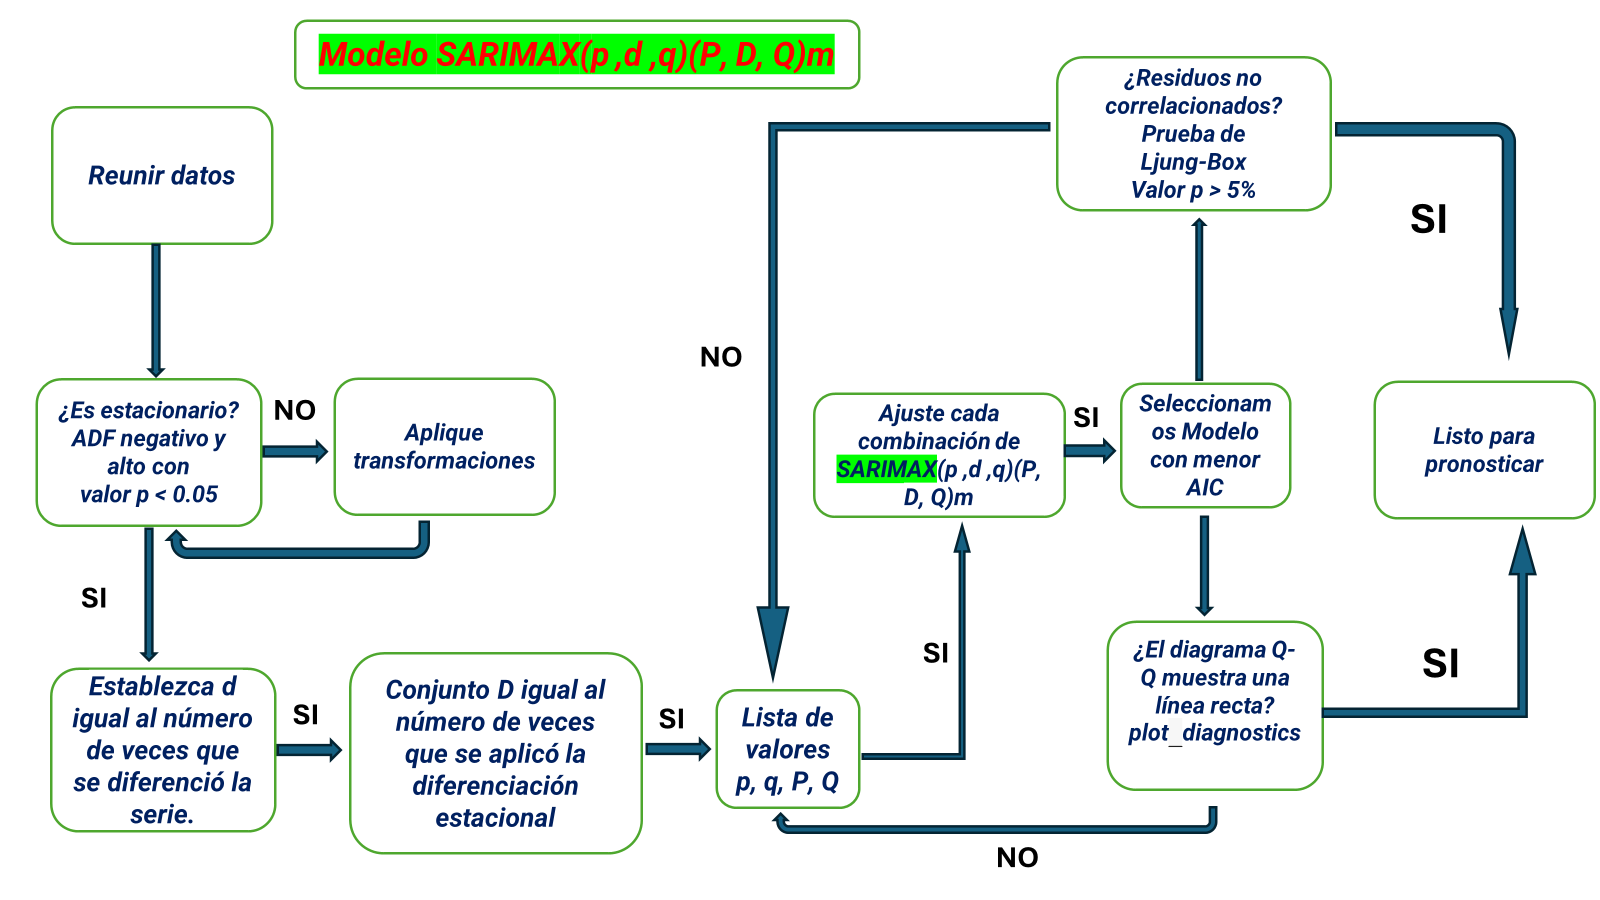

+ **Figura 9.3 Procedimiento general de modelado para el modelo SARIMAX. Este procedimiento se puede aplicar a cualquier problema, ya que el modelo SARIMAX es el modelo de pronóstico más general y puede dar cabida a todos los diferentes procesos y propiedades de las series temporales que hemos explorado. Observe que el único cambio aquí es que estamos ajustando un modelo SARIMAX en lugar de un modelo SARIMA como hicimos en el capítulo 8. El resto del procedimiento sigue siendo el mismo.**

### **Paso 7. El Modelo que nos permitira encontrar los parametros del modelos SARIMA y calcular el AIC**

In [ ]:
import tqdm
def optimize_sarimax(
        endog: pd.Series | list, exog: pd.Series | list, order_l: list,
        d: int, D: int, s:int) -> pd.DataFrame:

    '''
    Given a list of combinations of p,q test different combinations of arma
    orders, and compare them against each other using Akaike Information
    criterion.

    :param endog typing.Union[pd.Series, list]: the observed time-series process
    :param order_l list: list of all combinations of p and q
    :param d int: number of times the dataset needs to be diff to become
                  stationary

    :returns: dataframe with two columns, one the combination of p and q,
        the other the AIC score, the dataframe is already sorted.
    :rtype: pd.DataFrame
    '''

    results = []

    for order in tqdm.tqdm_notebook(order_l):
        try:
            model = sm.tsa.statespace.SARIMAX(
                endog,
                exog,
                order = (order[0], d, order[1]),
                seasonal_order = (order[2], D, order[3], s),
                simple_differencing = False,
            )
            model = model.fit(disp = False)
        except:
            continue

        aic = model.aic
        results.append([order, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']

    # sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by = 'AIC', ascending = True)
    result_df = result_df.reset_index(drop = True)

    return result_df

### **Paso 8. Implementando SARIMAX - Ajustamos todos los modelos SARIMAX y calculamos el AIC**

### **a. Creamos la lista de todos los parametros (p,d,q)(P,D,Q) y m=s**

In [ ]:
### **a. Creamos la lista de todos los parametros (p,d,q)(P,D,Q) y m=s**
# Crea una lista para nuestros posibles valores de p y q.
ps = range(0, 4) # Permita que p y q varíen de 0 a 12 para capturar
#información estacional.
qs = range(0, 4)
Ps = range(0, 4)
Qs = range(0, 4)

d = 1
D = 0
# D se establece en 0 porque estamos trabajando con un modelo ARIMA(p,d,q).
s = 4 # dado que los datos se recopilan trimestralmente m = s = 4

### **b. lista con todas las combinaciones posibles para p,q,P,Q**

In [ ]:
### **b. lista con todas las combinaciones posibles para p,q,P,Q**
order_l = list(itertools.product(ps, qs, Ps, Qs))

### **c. Funcion objetivo y variables exogenas para aplicar $SARIMAX(p,d,q)(P,D,Q)_m$ con el AIC**

In [ ]:
target = df['realgdp']
exog = df[['realcons', 'realinv', 'realgovt', 'realdpi', 'cpi']]

###. **d. Conjunto de entenamiento para evaluar el modelo SARIMAX(p,d,q)(P,D,Q)m con el AIC**
+ Para entrenar el modelo, utilizaremos las primeras 200 instancias de las variables objetivo y exógenas.
+ Luego, ejecutaremos la función optimized_SARIMAX y seleccionaremos el modelo con el AIC más bajo.

In [ ]:
###. **d. Conjunto de entenamiento para evaluar el modelo SARIMAX(p,d,q)(P,D,Q)m con el AIC**
target_train = target[:200]
exog_train = exog[:200]

### **e. Obteniendo los modelos SARIMAX y el AIC**

In [ ]:
### **e. Obteniendo los modelos SARIMAX y el AIC**
result_df = optimize_sarimax(target_train, exog_train, order_l, d, D, s)
result_df

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p,q,P,Q)",AIC
0,"(3, 3, 0, 0)",1742.824297
1,"(3, 3, 1, 0)",1744.966208
2,"(3, 3, 0, 1)",1744.996576
3,"(2, 2, 0, 0)",1745.449024
4,"(2, 2, 0, 1)",1746.323743
...,...,...
251,"(0, 2, 0, 0)",1761.579044
252,"(0, 3, 0, 0)",1762.317095
253,"(0, 0, 0, 0)",1764.754980
254,"(1, 0, 0, 0)",1765.379412


#### **f. Evaluamos todos los modelos $SARIMA(p,d,q)(P,D,Q)_m$ con el AIC**

+ Una vez completada, la función devuelve el veredicto de que el modelo $SARIMAX(3,1,3)(0,0,0)_4$ es el modelo con el AIC más bajo.
+ Observe que el componente estacional del modelo solo tiene órdenes de 0.
+ Esto tiene sentido, ya que no hay un patrón estacional visible en el gráfico del PIB real, como se muestra en la figura 9.4.
+ Por lo tanto, el componente estacional es nulo y tenemos un modelo ARIMAX(3,1,3).

### **Paso 9. Análisis de los Residuos para el modelo $SARIMAX(3,1,3)(0,0,0)_{4}=ARIMAX(3,1,3)$ - método plot_diagnostics**.

In [ ]:
model = sm.tsa.statespace.SARIMAX(
    target_train,
    exog_train,
    order = (3, 1, 3),
    seasonal_order = (0, 0, 0, 4),
    simple_differencing = False,
)
model = model.fit(disp = False)
residuals = model.resid

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                realgdp   No. Observations:                  200
Model:               SARIMAX(3, 1, 3)   Log Likelihood                -859.412
Date:                Wed, 26 Jun 2024   AIC                           1742.824
Time:                        21:09:39   BIC                           1782.344
Sample:                             0   HQIC                          1758.819
                                - 200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
realcons       0.9708      0.045     21.505      0.000       0.882       1.059
realinv        1.0132      0.033     30.693      0.000       0.948       1.078
realgovt       0.7283      0.127      5.728      0.000       0.479       0.977
realdpi        0.0102      0.025      0.408      0.683      -0.039       0.059
cpi            5.8719      1.299      4.520      0.000       3.326       8.418
ar.L1          1.0636      0.402      2.646      0.008       0.276       1.852
ar.L2          0.4957      0.708      0.700      0.484      -0.892       1.883
ar.L3         -0.6766      0.340     -1.990      0.047      -1.343      -0.010
ma.L1         -1.1028      0.434     -2.541      0.011      -1.953      -0.252
ma.L2         -0.3284      0.775     -0.424      0.672      -1.847       1.191
ma.L3          0.6518      0.407      1.600      0.110      -0.146       1.450
sigma2       331.2909     30.734     10.779      0.000     271.053     391.529
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                13.34
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               3.57   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### **Acerca del resumen del modelo**
+ En la figura 9.5, observará que todas las variables exógenas tienen un valor p menor que 0,05, excepto realdpi, que tiene un valor p de 0,712.
+ Esto significa que el coeficiente de realdpi no es significativamente diferente de 0.
+ También observará que su coeficiente es 0,0091.
+ Sin embargo, el coeficiente se mantiene en el modelo, ya que el valor p no determina la relevancia de este predictor para pronosticar nuestro objetivo.

### **Paso 10. Análisis gráfico de los Residuos para el modelo $SARIMAX(3,1,3)(0,0,0)_{4}=ARIMAX(3,1,3)$ - método plot_diagnostics**.

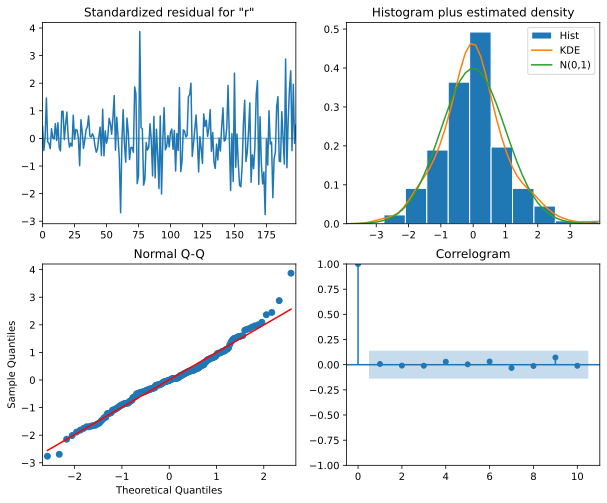

In [ ]:
model.plot_diagnostics(figsize = (10, 8))
plt.show()

#### **Análisis de residuos del modelo seleccionado**
+ Se puede ver que los residuos no tienen tendencia y una varianza bastante constante a lo largo del tiempo, al igual que el ruido blanco.
+ En el gráfico superior derecho, la distribución de residuos es muy cercana a una distribución normal.
+ Esto se ve respaldado por el gráfico Q-Q en la parte inferior izquierda, que muestra una línea bastante recta que se encuentra en y = x.
+ Finalmente, el correlograma no muestra coeficientes significativos después del retardo 0, al igual que el ruido blanco.
+ Por lo tanto, a partir de un análisis gráfico, los residuos de este
modelo se parecen al ruido blanco.

### **Paso 11. Prueba de independencia de los residuos- prueba de Ljung-Box**
+ Nuestro último paso es ejecutar la prueba de **Ljung-Box** para determinar si los residuos están correlacionados.
+ Si los valores p devueltos superan 0,05, no podemos rechazar la hipótesis nula, lo que significa que nuestros residuos no están correlacionados y se distribuyen de forma independiente, al igual que el ruido blanco.
+ Aplicaremos la prueba en los primeros 10 rezagos y estudiaremos los valores p. Si todos los valores p son mayores que.

In [ ]:
### **Prueba de Ljung - Box para los residuos con el modelo $SARIMA(2,1,1)(1,1,2)_{12}$
sm.stats.acorr_ljungbox(residuals, lags = range(1, 11))

,lb_stat,lb_pvalue
1,0.092071,0.761560
2,0.198871,0.905348
3,0.200938,0.977438
4,1.257216,0.868591
5,1.258003,0.939193
6,1.285134,0.972471
7,1.476883,0.983099
8,1.486838,0.992924
9,1.859312,0.993502
10,1.866005,0.997268


#### **Análisis de la prueba Prueba de Ljung-Box**
+ **Los valores p devueltos son todos mayores que 0,05, por lo que rechazamos la hipótesis nula y concluimos que los residuos no están correlacionados**

### **Paso 12. Haga pronósticos sobre el conjunto de prueba. Utilice un método ingenuo último valor conocido y un modelo $SARIMAX(3,1,3)$**
+ Como se mencionó anteriormente, la advertencia de usar un modelo SARIMAX es que es razonable predecir solo el siguiente paso de tiempo, para evitar predecir también las variables exógenas, lo que nos llevaría a acumular errores de predicción en el pronóstico final.
+ En cambio, para probar nuestro modelo, predecimos el siguiente paso de tiempo varias veces y promediamos los errores de cada predicción.
+ Esto se hace utilizando la función rolling_forecast, que definimos y con la que trabajamos en los capítulos 4 a 6.
+ Como modelo de referencia, utilizaremos el método del último valor conocido.

In [ ]:
import tqdm

def rolling_forecast(endog: pd.DataFrame, exog: pd.DataFrame,
                     train_len: int, horizon: int,
                     window: int, method: str) -> list:
    '''
    Dado un conjunto de datos, pronostique utilizando uno de dos métodos:

1. último valor (last)
2. SARIMAX(3,1,3)(0,0,0)4 (sarimax)

la longitud de entrenamiento se actualizará con cada iteración como si estuviéramos
viendo nuevas observaciones

:param pd.DataFrame df: marco de datos con dos columnas
:param int train_len: número de puntos de datos que se pueden usar para ajustar el
modelo
:param int horizon: longitud del conjunto de prueba, cuántos valores queremos predecir

:param int window: cuántos pasos de tiempo se predicen a la vez
:param int method: last | SARIMAX, método utilizado para hacer el pronóstico

:return:
:rtype: list
    '''

    # train length + the horizon make the total length of the dataset
    # meaning it includes the prediction as well
    total_len = train_len + horizon

    if method.lower() == 'last':
        pred_last_value = []

        for i in range(train_len, total_len, window):
            last_value = endog[:i].iloc[-1]
            pred_last_value.extend(last_value for _ in range(window))

        return pred_last_value

    if method.lower() == 'sarimax':
        pred_sarimax = []

        # tqdm part adds a progressbar, really helpful :)
        for i in  tqdm.tqdm_notebook(range(train_len, total_len, window)):
            model = sm.tsa.statespace.SARIMAX(
                endog[:i], exog[:i],
                order = (3, 1, 3), seasonal_order = (0, 0, 0, 4),
                simple_differencing = False,
            )
            r = model.fit(disp = False)
            predictions = r.get_prediction(exog = exog)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_sarimax.extend(oos_pred)

        return pred_sarimax

    return []

### **Paso 13. Conjunto de entreamineot y de prueba**
+ La función recursive_forecast nos permite predecir el siguiente paso de tiempo en un período de tiempo determinado.
+ En concreto, la utilizaremos para pronosticar el siguiente paso de tiempo a partir de 2008 y hasta el tercer trimestre de 2009.

In [ ]:
target_train = target[:196]
target_test = target[196:]

In [ ]:
pred_df = pd.DataFrame({'actual': target_test})

In [ ]:
TRAIN_LEN = len(target_train)
HORIZON = len(target_test)
WINDOW = 1

In [ ]:
pred_last_value = rolling_forecast(target, exog, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_sarimax = rolling_forecast(target, exog, TRAIN_LEN, HORIZON, WINDOW, 'SARIMAX')
pred_df['pred_last_value'] = pred_last_value
pred_df['pred_sarimax'] = pred_sarimax

  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
pred_df

,actual,pred_last_value,pred_sarimax
196,13366.865,13391.249,13344.063231
197,13415.266,13366.865,13373.510608
198,13324.600,13415.266,13378.824552
199,13141.920,13324.600,13327.772094
200,12925.410,13141.920,13133.236577
201,12901.504,12925.410,12887.105293
202,12990.341,12901.504,12873.794486


### **Paso 24. Construya los graficos de predicción para los tres métos: Ingenuo, $ARIMA(11,2,3)$ y $SARIMA(2,1,1)(1,1,2)_{12}$**

In [ ]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


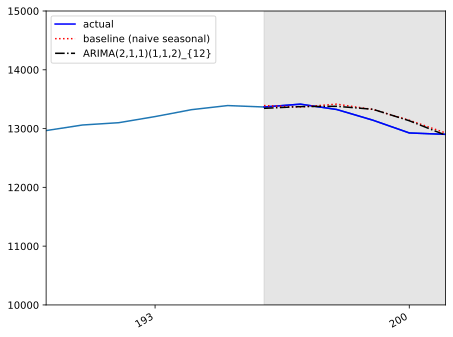

In [ ]:
fig, ax = plt.subplots()

ax.plot(df.realgdp)
ax.plot(pred_df.actual, 'b', label = 'actual')
ax.plot(pred_df.pred_last_value, 'r:', label = 'baseline (naive seasonal)')
ax.plot(pred_df.pred_sarimax, 'k-.', label = 'ARIMA(2,1,1)(1,1,2)_{12}')


ax.legend(loc = 2)

ax.axvspan(196, 202, color='#808080', alpha = 0.2)

ax.set_xlim(190, 201)

ax.set_ylim(10000, 15000)

plt.xticks(
    [193, 200])



fig.autofmt_xdate()
plt.tight_layout()

+ **El gráfico se muestra en la figura 8.13. Las líneas de los modelos ARIMA y SARIMA se ubican casi sobre los datos observados, lo que significa que las predicciones son muy cercanas a los datos observados.**

### **Paso 25. Obtenga el Error absoluto medio (MAE) y el MAPE e interpretelo**

In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape_last_value = mape(pred_df['actual'], pred_df['pred_last_value'])
mape_sarimax = mape(pred_df['actual'], pred_df['pred_sarimax'])

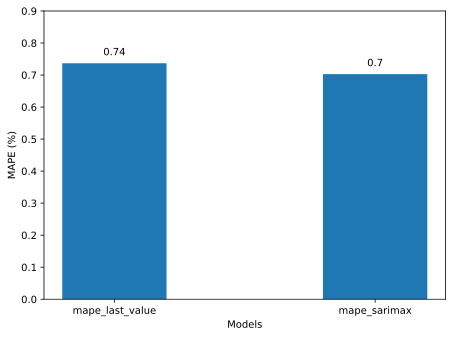

In [ ]:
fig, ax = plt.subplots()

x = ['mape_last_value', 'mape_sarimax']
y = [mape_last_value, mape_sarimax]


ax.bar(x, y, width = 0.4)

ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 0.9)

for index, value in enumerate(y):
    plt.text(
        x = index, y = value + 0.025, s = str(round(value,2)), ha = 'center'
    )

plt.tight_layout()

+ **Figura 9.7 Error porcentual absoluto medio (MAPE) de los pronósticos de cada método. Se puede ver que el modelo SARIMAX solo tiene un MAPE ligeramente menor que el modelo de referencia. Esto resalta la importancia de usar un modelo de referencia, ya que un MAPE de 0,70 % es extremadamente bueno, pero un pronóstico ingenuo logra un MAPE de 0,74 %, lo que significa que el modelo SARIMAX solo tiene una pequeña ventaja**.